# Paradigmes complets dans les échantillons de russe
Le but est de trouver le nombre de paradigmes complets en fonction de la taille de l'échantillon

In [442]:
# -*- coding: utf8 -*-
import pandas as pd
import pickle, glob

- display permet d'afficher des objets à la demande sans passer par print

In [443]:
from IPython.display import display
debug=False

In [444]:
million=1000000
nbMillions=1
tailleEchantillons="%dMo"%nbMillions
echantillons="160804-1"
tiragesJour=5000
joursAn=365

In [445]:
def lireLexique(nomLexique):
    with open(nomLexique, 'rb') as input:
        lexique=pickle.load(input)
    return lexique

In [446]:
listeTiragesFichiers=glob.glob("/Users/gilles/ownCloud/Recherche/Boye/Russian-Data/*-Tirage.pkl")

In [447]:
def tiragesNom(nom):
    result=[tirage for tirage in listeTiragesFichiers if nom in tirage]
    return result

In [448]:
def nbFormesEchantillons(nom):
    print nom
    for tirage in tiragesNom(nom):
        sample=lireLexique(tirage)
        print sample[sample["tir1"]>0]["tir1"].count(),
        print sample[sample["tir1"]>0]["tir1"].sum(),
        print tirage

In [449]:
def exemplairesClasse(row):
    return row.sum()

In [450]:
def completeParadigm(row):
    return row.min()

In [451]:
listeTirages=tiragesNom(echantillons)
len(listeTirages)

50

In [452]:
def compteParadigmesComplets(lexique,returnParadigmes=False):
    paradigmes=pd.pivot_table(lexique,values="tir1",columns=["case"],index=["Gloss","NM class","Animacy"],aggfunc=sum)
    paradigmes["min"]=paradigmes.apply(completeParadigm,axis=1)
    nbClasses=paradigmes[["min"]].unstack(level=0)
    nbClasses["nbExemplaires"]=nbClasses.apply(exemplairesClasse,axis=1)
    if returnParadigmes:
        return (paradigmes[paradigmes["min"]>0],nbClasses[nbClasses["nbExemplaires"]>0])
    else:  
        return (len(paradigmes[paradigmes["min"]>0]), len(nbClasses[nbClasses["nbExemplaires"]>0]))

In [453]:
lstTirAgesParadigmes=[]

In [454]:
nomLexique0=listeTirages.pop(0)
lexique=lireLexique(nomLexique0)
tirage=1
age=float("%3.1f"%(float(nbMillions)*million/tiragesJour/joursAn))
taille=lexique[lexique["tir1"]>0]["tir1"].count()
nbParadigmesComplets,nbClassesCompletes=compteParadigmesComplets(lexique)
#print "nbMTirages",nbMillions*tirage,"années",nbMillions*million/tiragesJour/joursAn,"nbFormes",taille, "nbParadigmesComplets",nbParadigmesComplets
if debug: print " ".join(["%dM tirages,"%(nbMillions),
       "%3.1f années,"%age,"nbFormes %d,"%taille, 
       "Paradigmes complets %d,"%nbParadigmesComplets,
       "Classes complètes %d"%nbClassesCompletes])  
lstTirAgesParadigmes.append([nbMillions*tirage,
                             age,taille,
                             nbParadigmesComplets,nbClassesCompletes])

In [455]:
for numero,tirage in enumerate(listeTirages):
#    print tirage
    ajout=lireLexique(tirage)
    lexique["tir1"]=lexique["tir1"]+ajout["tir1"]
    age=float("%3.1f"%(float(nbMillions)*(numero+2)*million/tiragesJour/joursAn))
    taille=lexique[lexique["tir1"]>0]["tir1"].count()
    nbParadigmesComplets,nbClassesCompletes=compteParadigmesComplets(lexique)
    if debug: print " ".join(["%dM de tirages,"%(nbMillions*(numero+2)),
           "%3.1f année(s),"%age,"nbFormes %d,"%taille, 
           "Paradigmes complets %d,"%nbParadigmesComplets,
           "Classes complètes %d"%nbClassesCompletes])           
    lstTirAgesParadigmes.append([nbMillions*(numero+2),
                                 age,taille,
                                 nbParadigmesComplets,nbClassesCompletes])

In [456]:
#print ", ".join(compteParadigmesComplets(lexique,True).sort_values(by="min",ascending=False).index.tolist())

In [457]:
dfTirAgesParadigmes=pd.DataFrame(lstTirAgesParadigmes,columns=["tirages","age","formes","paradigmes","classes"])

In [458]:
import matplotlib.pyplot as plt
%matplotlib inline

In [459]:
dfTirAgesParadigmes

,tirages,age,formes,paradigmes,classes
0,1,0.5,30214,20,10
1,2,1.1,31402,56,13
2,3,1.6,32352,100,13
3,4,2.2,33240,135,15
4,5,2.7,34016,176,17
5,6,3.3,34780,222,18
6,7,3.8,35514,246,19
7,8,4.4,36190,282,19
8,9,4.9,36811,306,19
9,10,5.5,37464,344,20


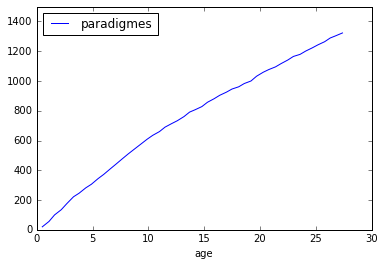

In [463]:
#dfTirAgesParadigmes.plot(x="age",y=["paradigmes","formes"])
dfTirAgesParadigmes.interpolate(method="cubic").plot(x="age",y=["paradigmes"])
plt.xlim(0,30)
plt.ylim(0,1500)
plt.show()

(0, 30)

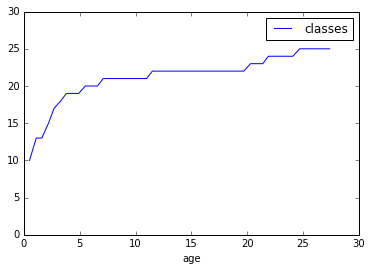

In [464]:
dfTirAgesParadigmes.interpolate(method="cubic").plot(x="age",y=["classes"])
plt.ylim(0,30)
plt.xlim(0,30)